In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("Final Fashion Dataset.csv")

In [2]:
df.shape

(36484, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36484 entries, 0 to 36483
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             36484 non-null  int64  
 1   id                  36484 non-null  int64  
 2   gender              36484 non-null  object 
 3   masterCategory      36484 non-null  object 
 4   subCategory         36484 non-null  object 
 5   articleType         36484 non-null  object 
 6   baseColour          36484 non-null  object 
 7   season              36484 non-null  object 
 8   year                36484 non-null  float64
 9   usage               36484 non-null  object 
 10  productDisplayName  36484 non-null  object 
 11  filename            36484 non-null  object 
 12  link                36484 non-null  object 
 13  ratings             36484 non-null  int64  
 14  review              36484 non-null  object 
 15  Month               36484 non-null  object 
 16  Pric

In [4]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
dtype: int64

In [5]:
df.usage.value_counts()

Casual          27597
Sports           3707
Ethnic           3040
Formal           2043
Smart Casual       64
Travel             26
Party               7
Name: usage, dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,user_id,id,year,ratings,Price (USD)
count,36484.000000,36484.000000,36484.000000,36484.000000,36484.000000
mean,55673.109336,27860.189124,2012.461737,3.600839,33.828610
std,25987.221109,16562.799723,1.860980,1.279767,11.320579
min,10022.000000,1163.000000,2007.000000,1.000000,10.000000
25%,32865.000000,13247.000000,2011.000000,3.000000,25.000000
50%,55706.000000,26471.500000,2012.000000,4.000000,34.000000
75%,78386.000000,41718.250000,2012.000000,5.000000,42.000000
max,99995.000000,60000.000000,2018.000000,5.000000,66.000000


In [8]:
catnames = [ 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season','usage','Month']
numnames = ['id','year','ratings','Price (USD)']

In [9]:
for i in catnames:
    print(f'{i}: {df[i].unique()}')

gender: ['Women' 'Men' 'Unisex' 'Boys' 'Girls']
masterCategory: ['Apparel' 'Accessories' 'Footwear']
subCategory: ['Bottomwear' 'Topwear' 'Bags' 'Watches' 'Shoes' 'Flip Flops' 'Jewellery'
 'Eyewear' 'Belts' 'Saree' 'Loungewear and Nightwear' 'Wallets' 'Socks']
articleType: ['Skirts' 'Kurtas' 'Handbags' 'Tshirts' 'Watches' 'Formal Shoes'
 'Flip Flops' 'Heels' 'Leggings' 'Backpacks' 'Earrings' 'Clutches'
 'Shirts' 'Casual Shoes' 'Dupatta' 'Jeans' 'Tops' 'Ring' 'Flats'
 'Suspenders' 'Sports Shoes' 'Sunglasses' 'Shorts' 'Belts' 'Sarees'
 'Nightdress' 'Jackets' 'Trousers' 'Messenger Bag' 'Track Pants' 'Kurtis'
 'Capris' 'Nehru Jackets' 'Sweatshirts' 'Wallets' 'Socks'
 'Necklace and Chains' 'Stockings' 'Waist Pouch' 'Patiala' 'Tunics'
 'Booties' 'Lounge Pants' 'Sweaters' 'Pendant' 'Duffel Bag' 'Tracksuits'
 'Baby Dolls' 'Bath Robe' 'Laptop Bag' 'Night suits' 'Tights' 'Jeggings'
 'Mobile Pouch' 'Jewellery Set' 'Lounge Shorts' 'Swimwear' 'Bangle'
 'Churidar' 'Salwar' 'Shrug' 'Bracelet' 'Waistc

In [10]:
dict_unique = {
    "numerical_columns": numnames,
    "unique_values": [df[i].nunique() for i in numnames]
}

In [11]:
df_unique = pd.DataFrame(dict_unique)
df_unique

,numerical_columns,unique_values
0,id,36484
1,year,12
2,ratings,5
3,Price (USD),57


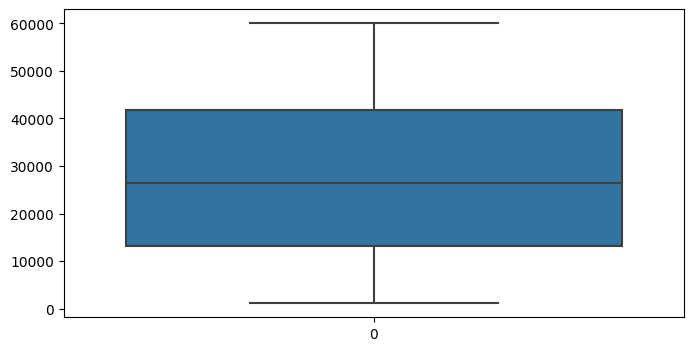

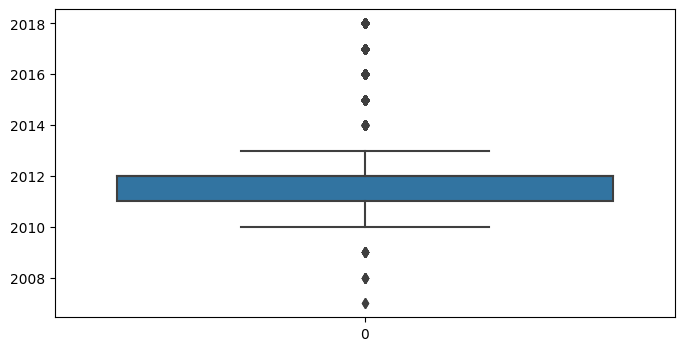

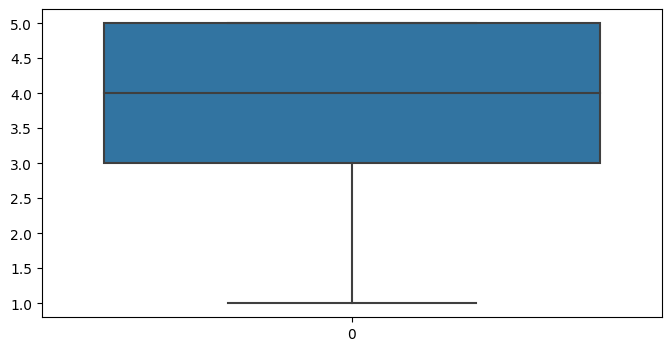

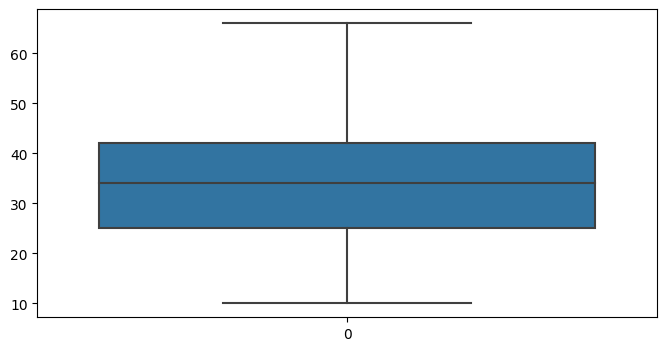

In [12]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

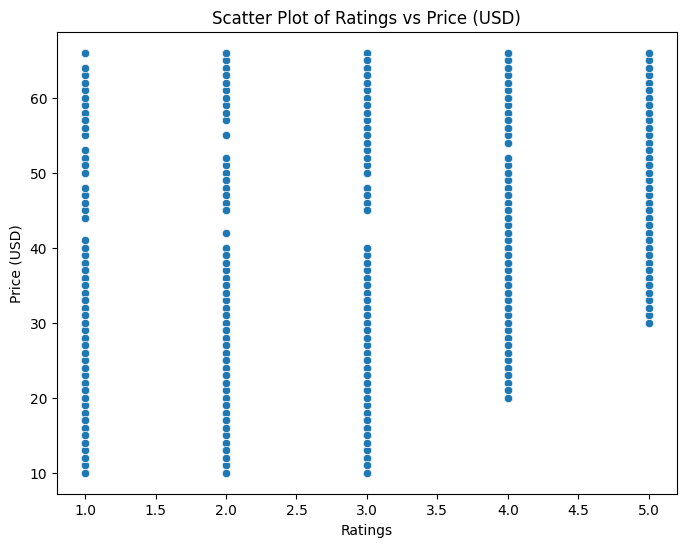

In [13]:
# Scatter plot for Ratings vs Price (USD)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ratings', y='Price (USD)')
plt.title('Scatter Plot of Ratings vs Price (USD)')
plt.xlabel('Ratings')
plt.ylabel('Price (USD)')
plt.show()


In [14]:
q25,q75 = np.percentile(df["year"],[25,75])


In [16]:
iqr = q75 - q25
iqr
q0 = q25 - 1.5*iqr
q100 = q75 + 1.4*iqr
q0,q100

(2009.5, 2013.4)

In [17]:
df = df[(df['year'] >= q0) & (df['year'] <= q100)]

In [18]:
df

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39
6,28289,12868,Men,Footwear,Shoes,Formal Shoes,Black,Spring,2012.0,Formal,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,August,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,73318,54078,Men,Footwear,Shoes,Sports Shoes,Orange,Summer,2012.0,Sports,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",September,41
36476,18851,13183,Men,Footwear,Shoes,Sports Shoes,White,Fall,2011.0,Sports,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",January,53
36477,55457,10264,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2013.0,Formal,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",November,43
36479,40311,45378,Women,Footwear,Shoes,Flats,Black,Summer,2012.0,Casual,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",November,48


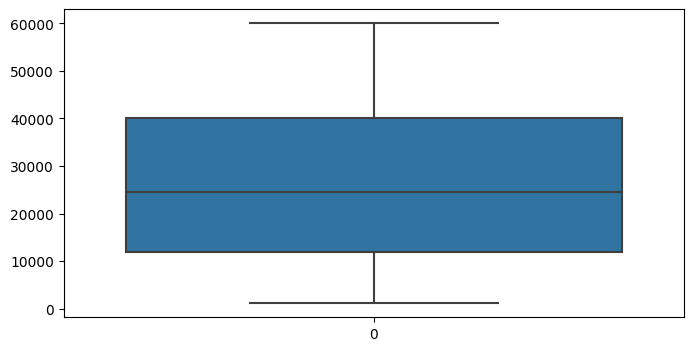

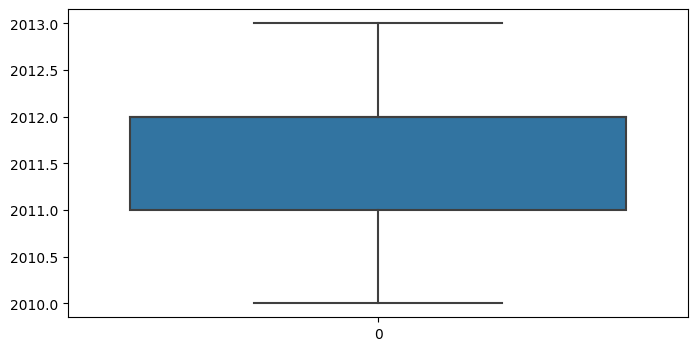

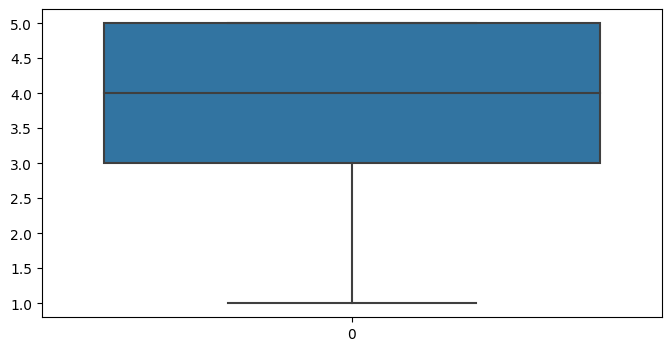

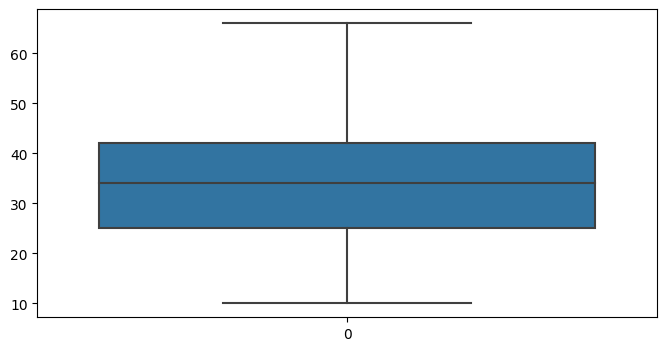

In [19]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

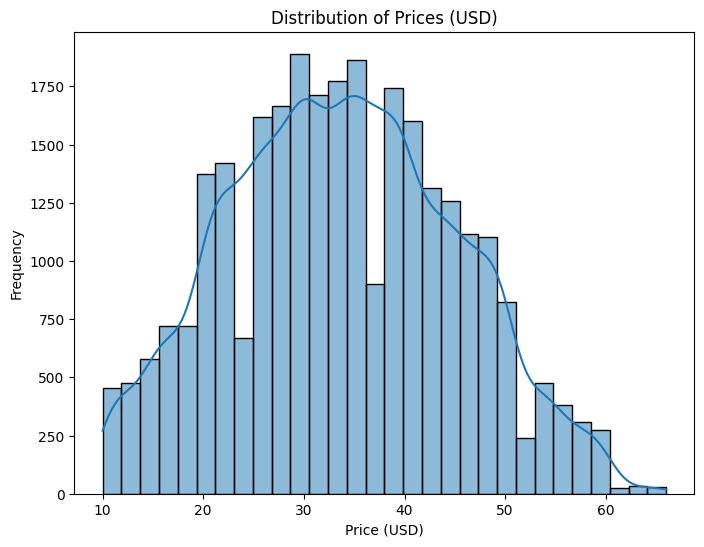

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price (USD)'], bins=30, kde=True)
plt.title('Distribution of Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

id:  0.2925079053459858
year:  -0.044228810268022695
ratings:  -0.6518348738113221
Price (USD):  0.10747816858420171


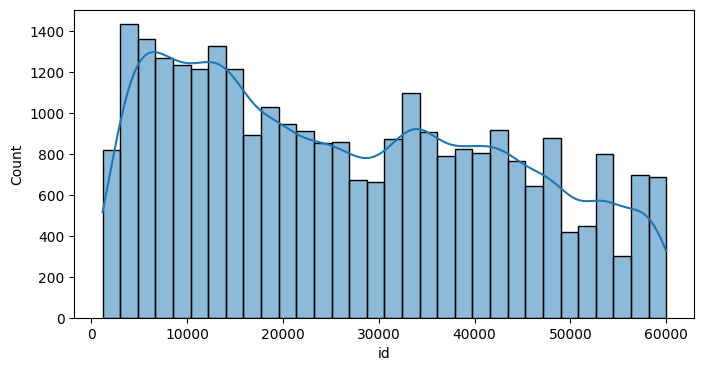

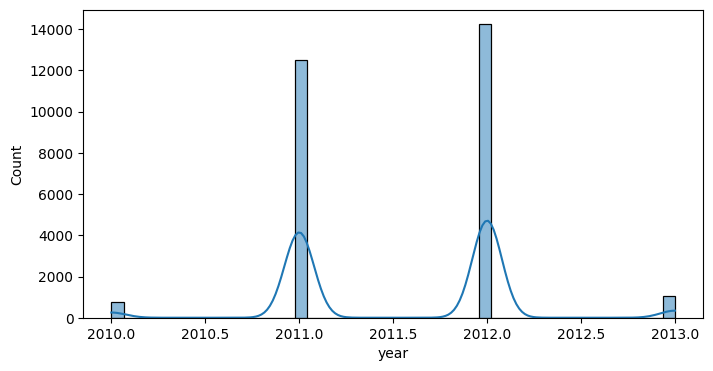

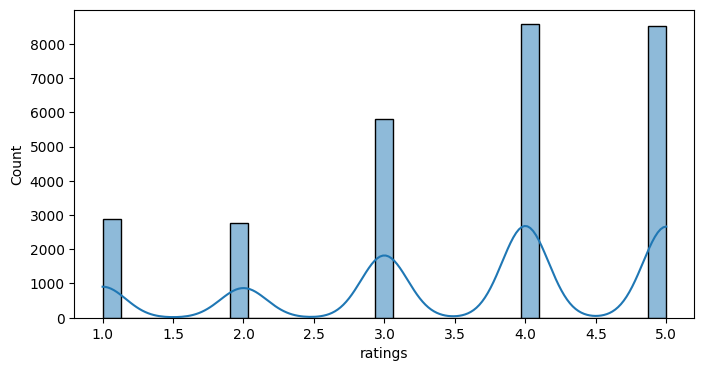

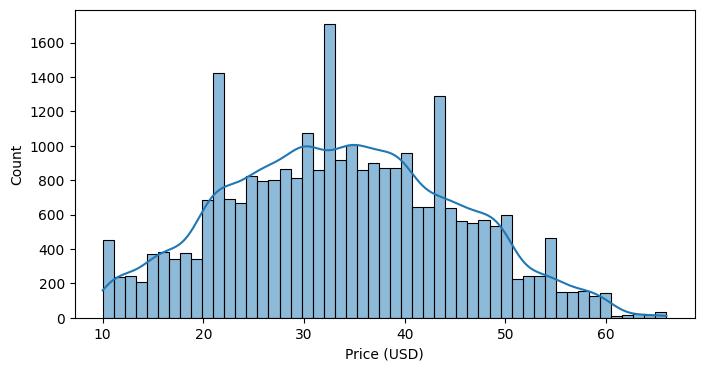

In [21]:
# plotting histograms to check the distribution of numerical data
from scipy.stats import skew
for i in numnames:
    plt.figure(figsize=(8,4))
    print(f"{i}: ",df[i].skew())
    sns.histplot(df[i],kde=True)

Frequency Distribution of categorical columns


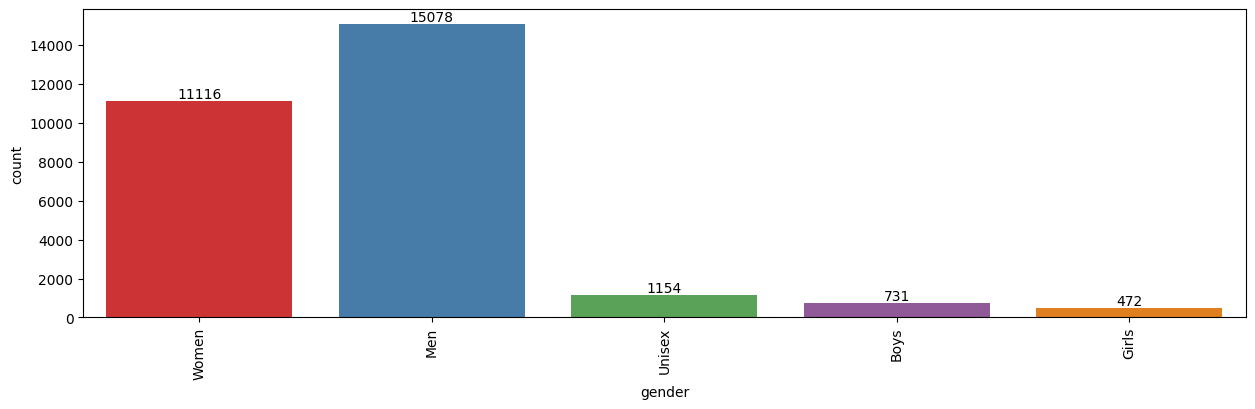

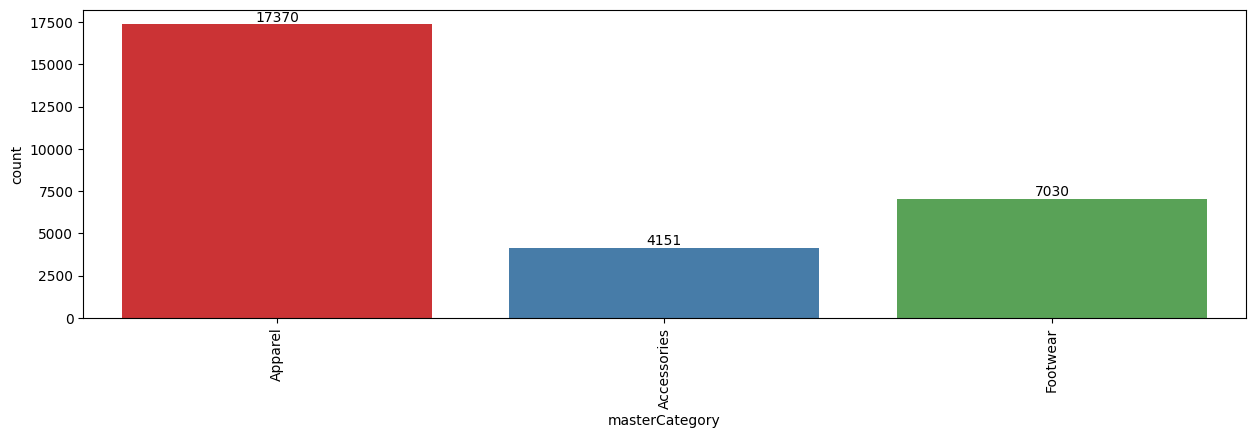

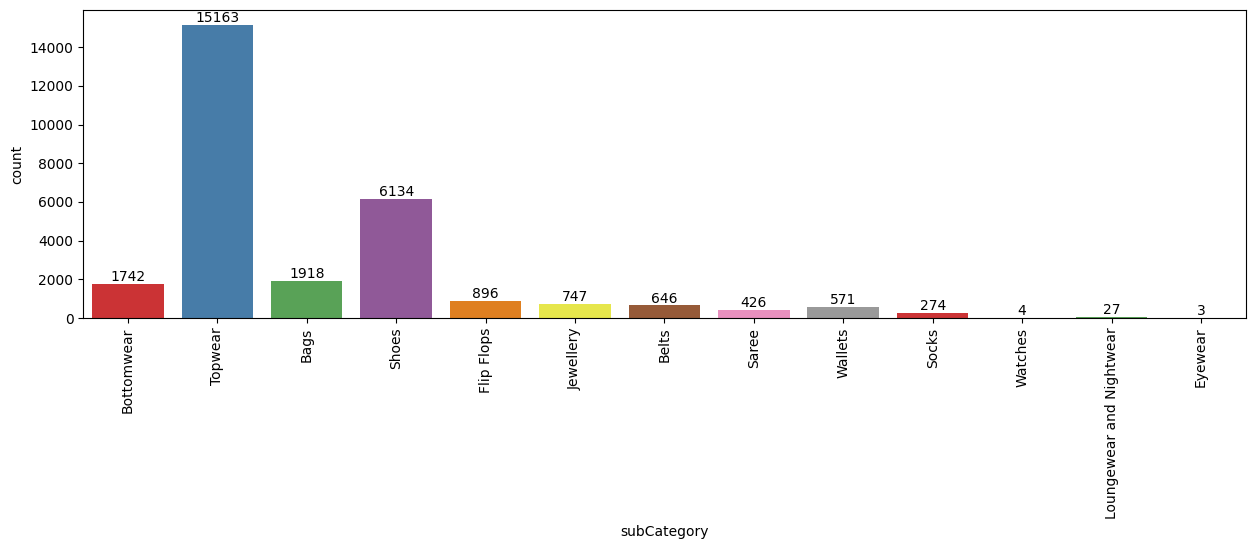

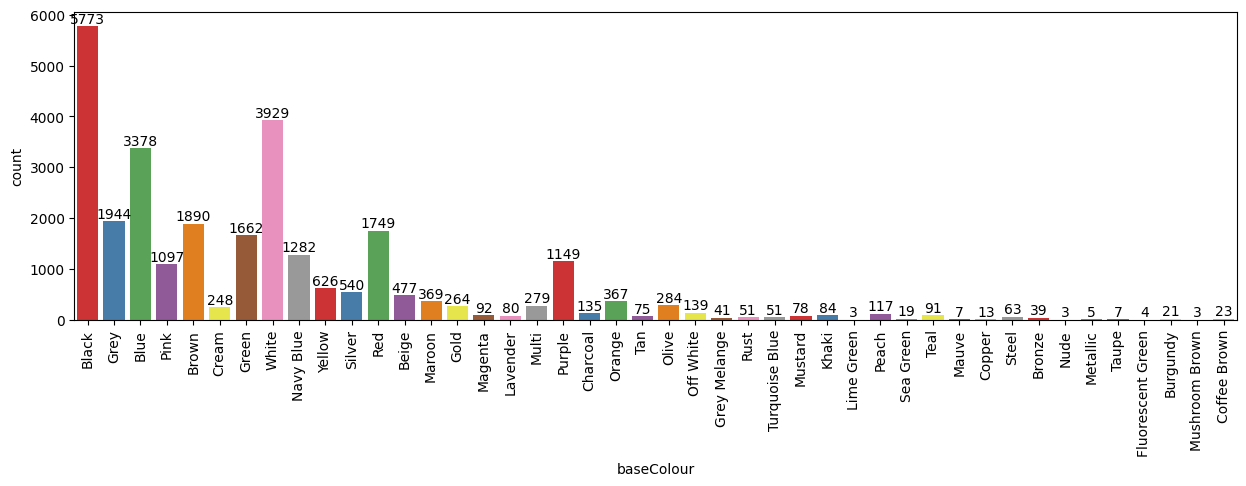

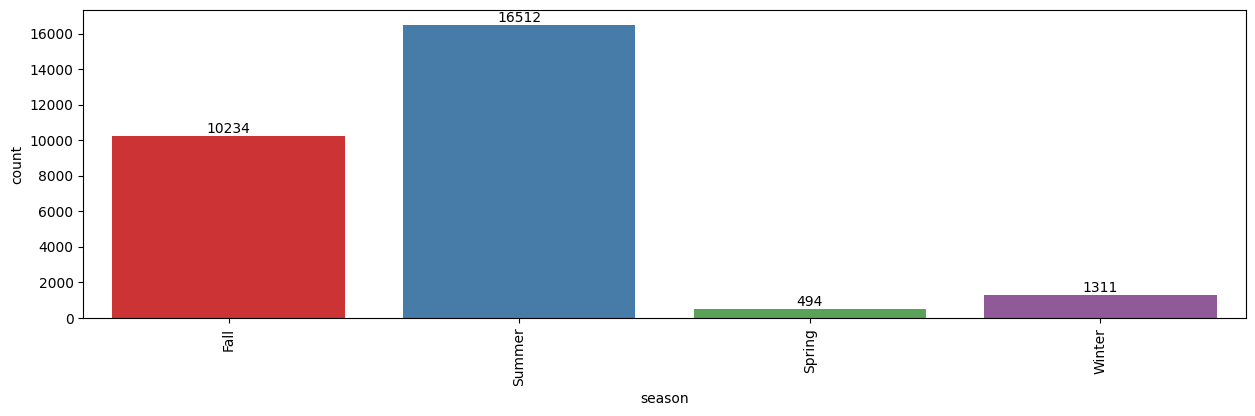

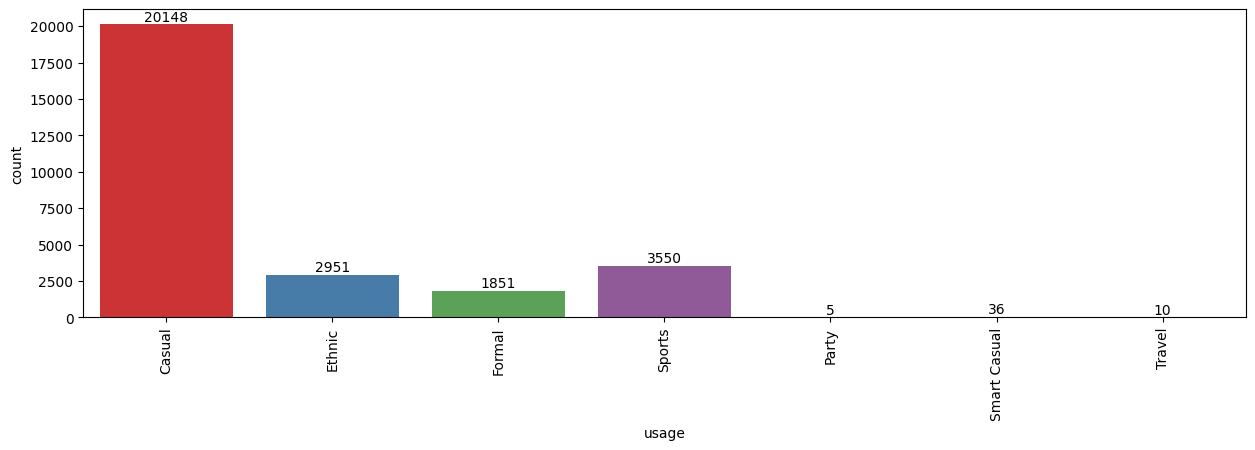

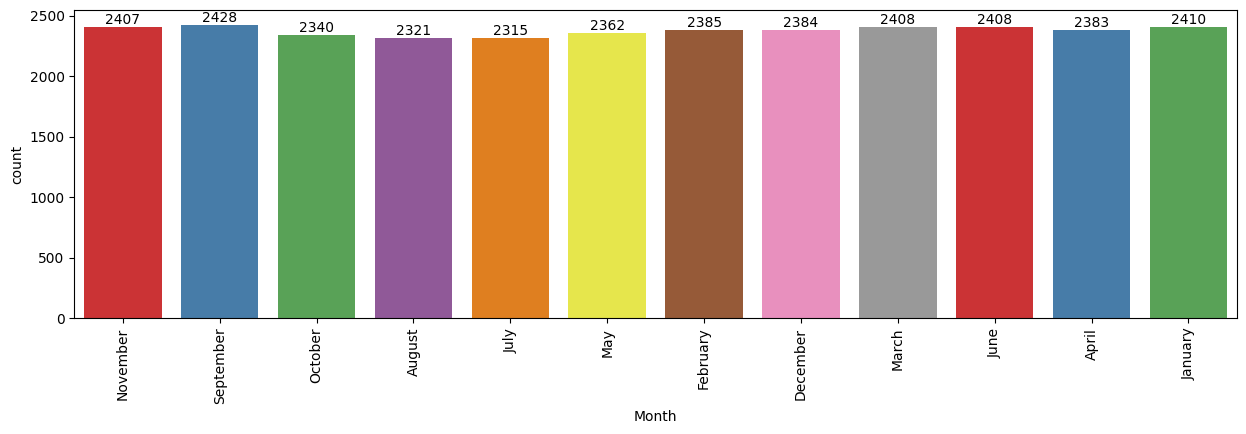

In [22]:
# understanding the distribution and frequency of categorical columns(demographics)
print('Frequency Distribution of categorical columns')
for i in catnames:
    if i == "articleType":
        continue
    plt.figure(figsize=(15, 4))
    ax = sns.countplot(data=df, x=i, palette='Set1')
    plt.xticks(rotation=90)
    for j in ax.containers:
        ax.bar_label(j)

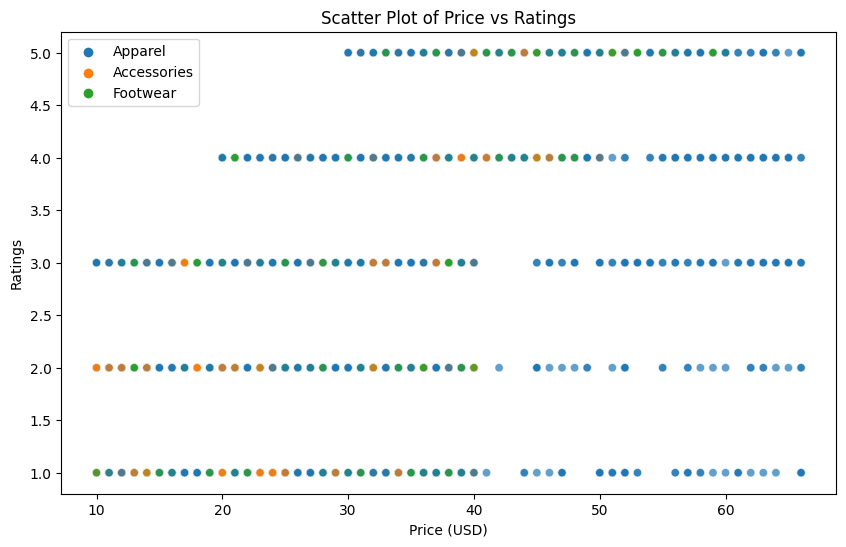

In [23]:
# Scatter plot of Price vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price (USD)', y='ratings', hue='masterCategory', alpha=0.7)
plt.title('Scatter Plot of Price vs Ratings')
plt.xlabel('Price (USD)')
plt.ylabel('Ratings')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Box Plot of Master category by Price(USD)')

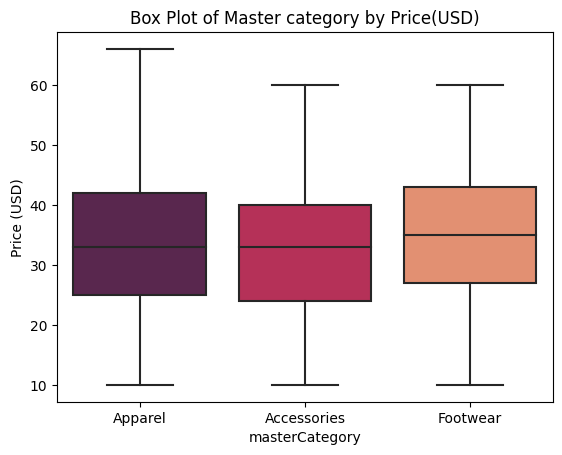

In [24]:
sns.boxplot(df,x='masterCategory',y='Price (USD)',palette='rocket')
plt.title("Box Plot of Master category by Price(USD)")

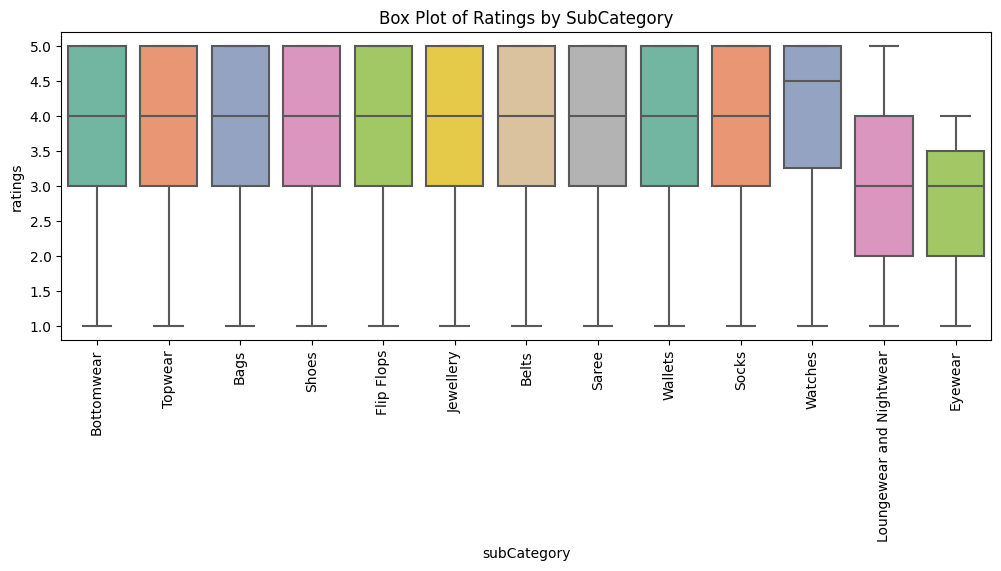

In [25]:
plt.figure(figsize=(12,4))
sns.boxplot(df,x='subCategory',y='ratings',palette='Set2')
plt.title("Box Plot of Ratings by SubCategory")
plt.xticks(rotation=90)
plt.show()

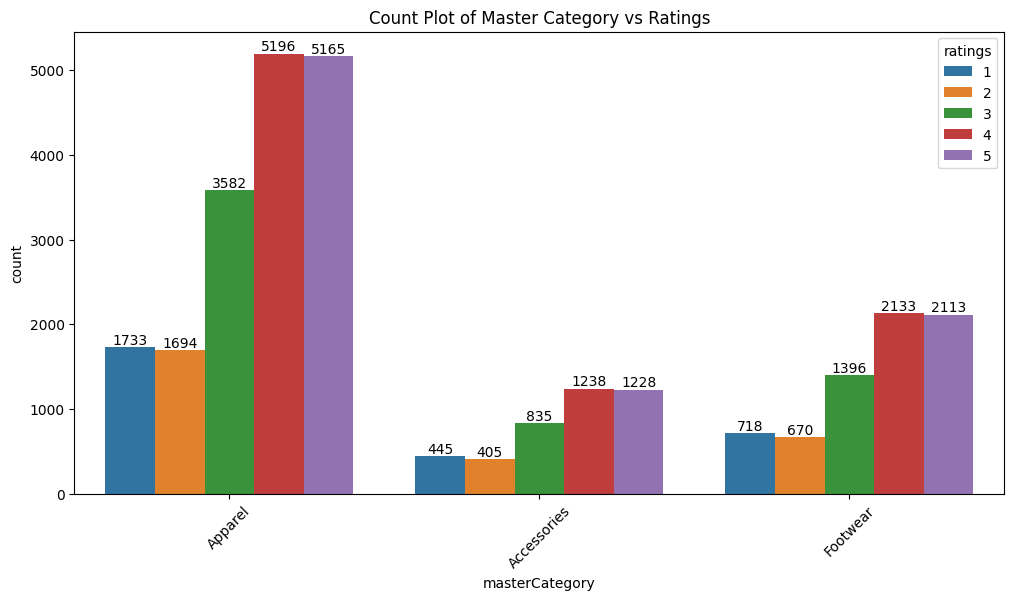

In [26]:
# Count plot of Master Category vs Ratings
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='ratings')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Count Plot of Master Category vs Ratings')
plt.xticks(rotation=45)
plt.show()

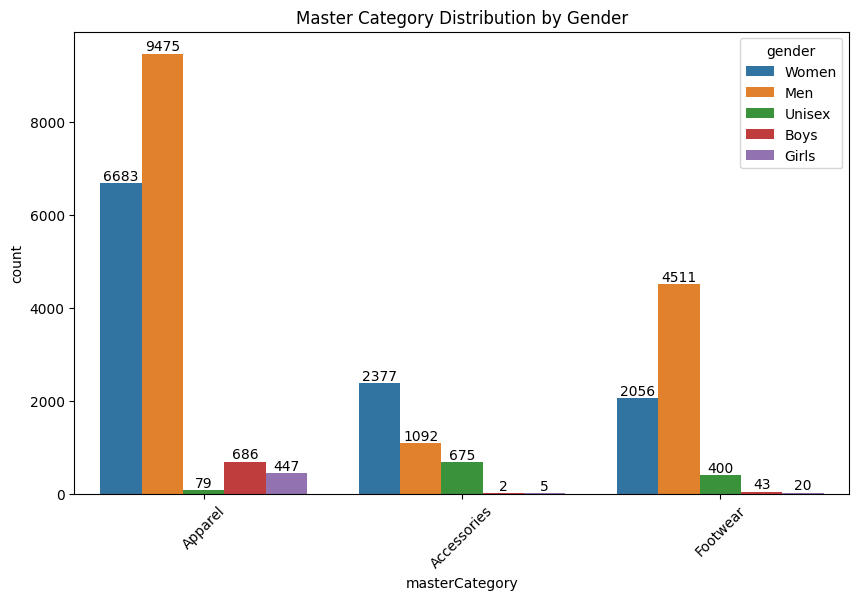

In [27]:
# Master Category vs Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Master Category Distribution by Gender')
plt.xticks(rotation=45)
plt.show()

In [28]:
df.subCategory.unique()

array(['Bottomwear', 'Topwear', 'Bags', 'Shoes', 'Flip Flops',
       'Jewellery', 'Belts', 'Saree', 'Wallets', 'Socks', 'Watches',
       'Loungewear and Nightwear', 'Eyewear'], dtype=object)

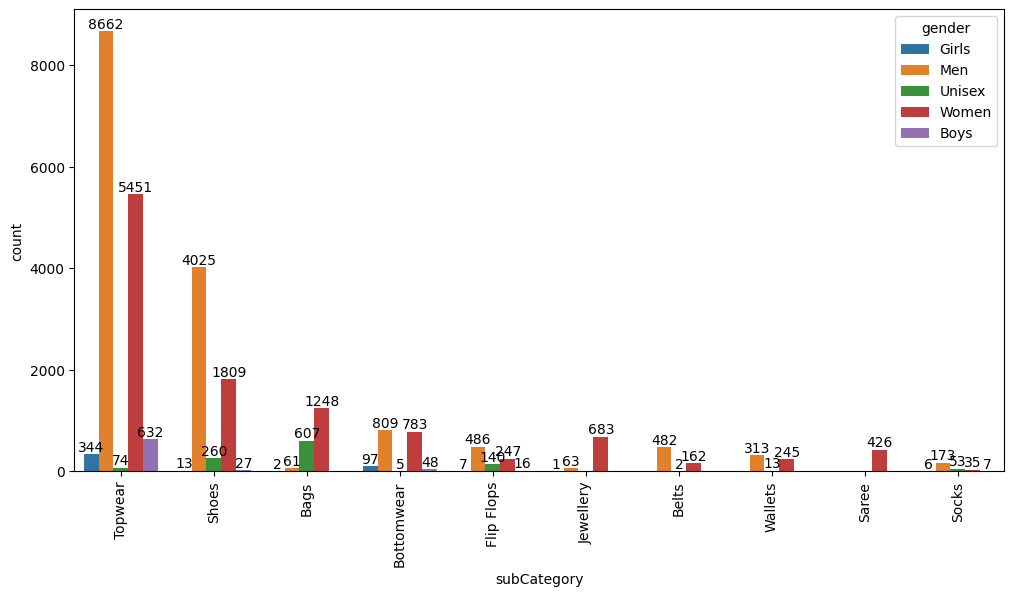

In [29]:
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='gender', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

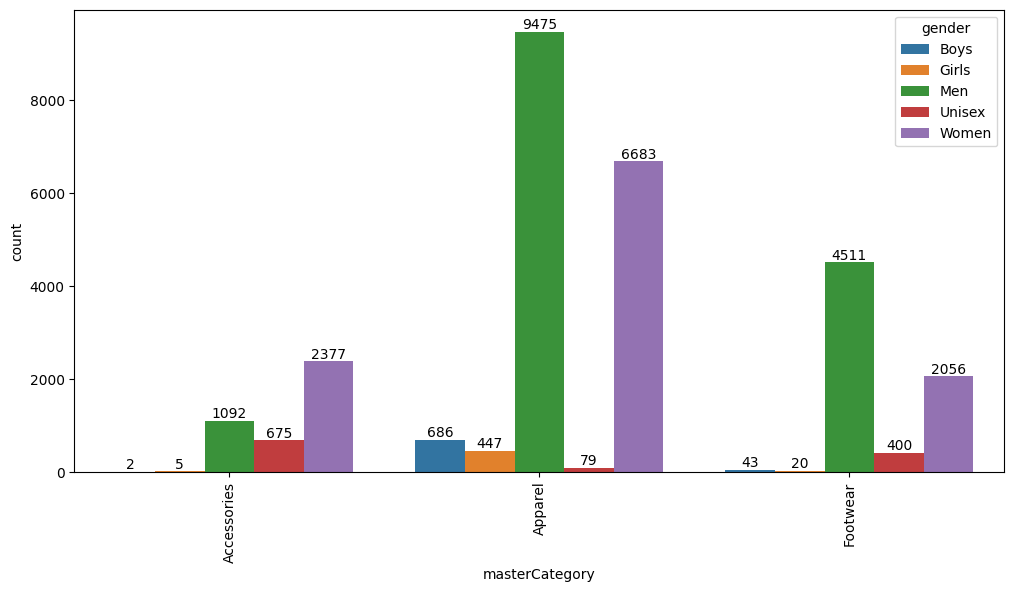

In [30]:
# Master Category vs Gender
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['masterCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='masterCategory', y='count', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

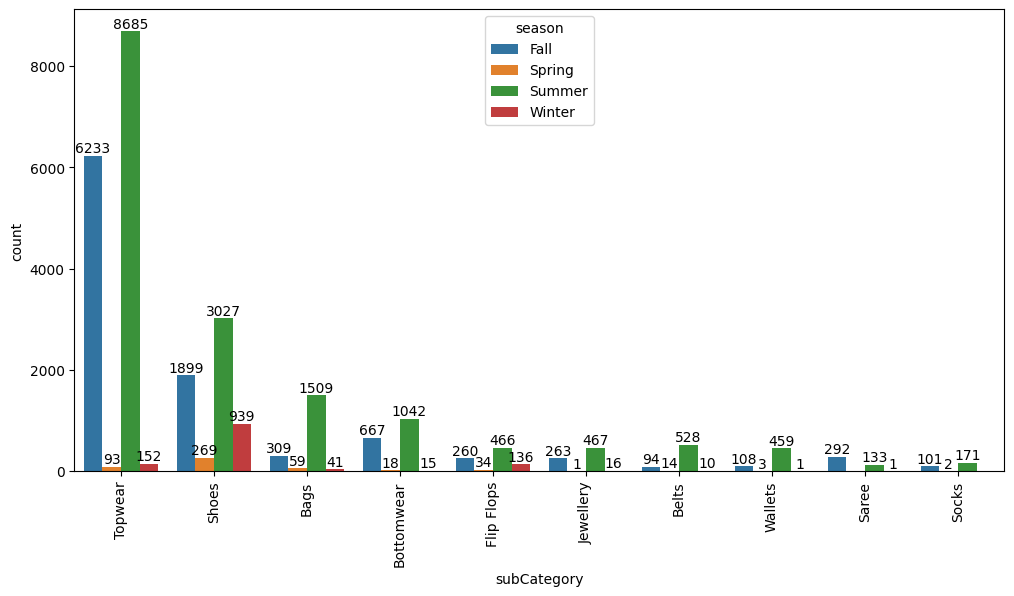

In [31]:
# subcategory vs season
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'season']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='season', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

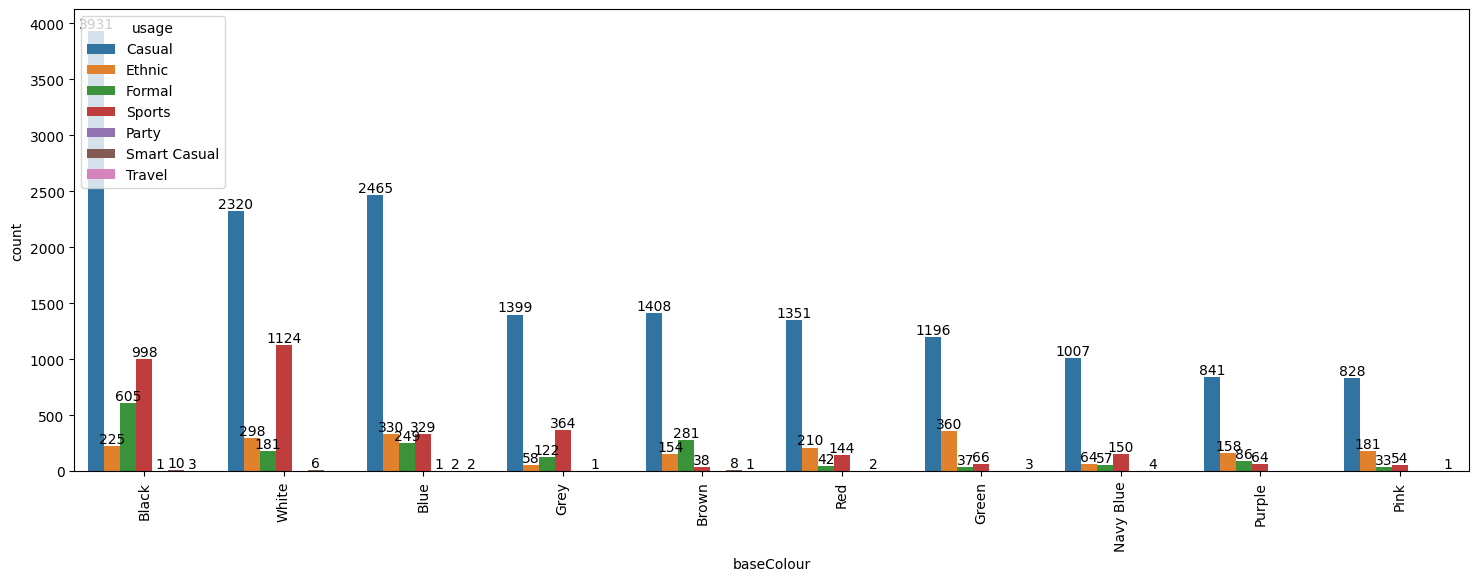

In [32]:
# base colour vs usage
plt.figure(figsize=(18,6))
df_grouped = df.groupby(['baseColour', 'usage']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='baseColour', y='count', hue='usage', order=df['baseColour'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

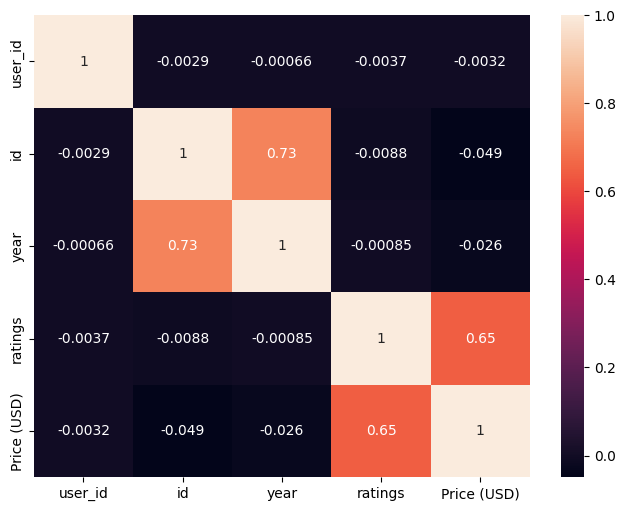

In [33]:
plt.figure(figsize=(8,6))
# Calculate correlation on numeric columns only, including the new 'gender_numeric' column
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

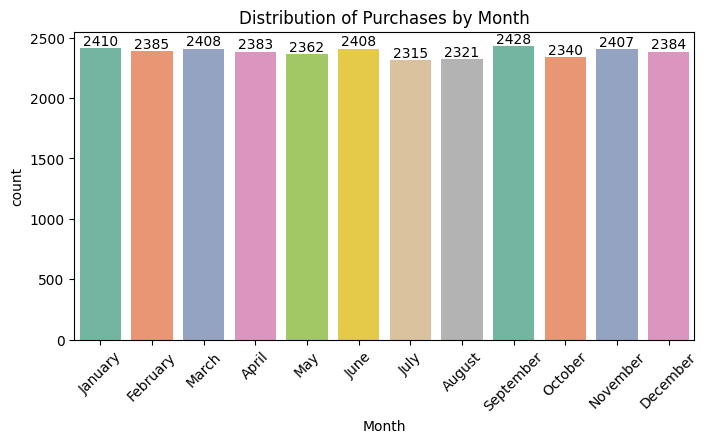

In [34]:
# Count plot for Month
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                   palette="Set2")
for i in ax.containers:
    plt.bar_label(i)
plt.title('Distribution of Purchases by Month')
plt.xticks(rotation=45)
plt.show()

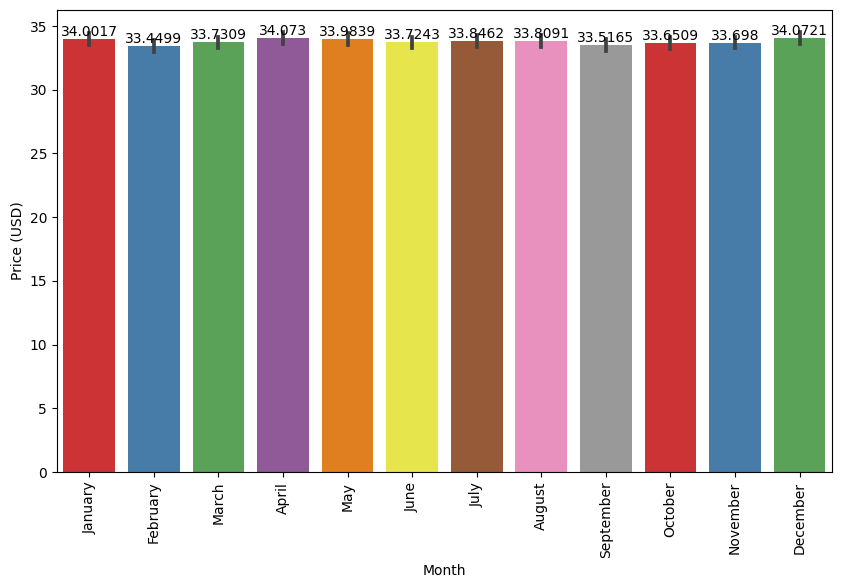

In [35]:
# price(usd) by month
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df,x="Month",y="Price (USD)",palette="Set1",
                 order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

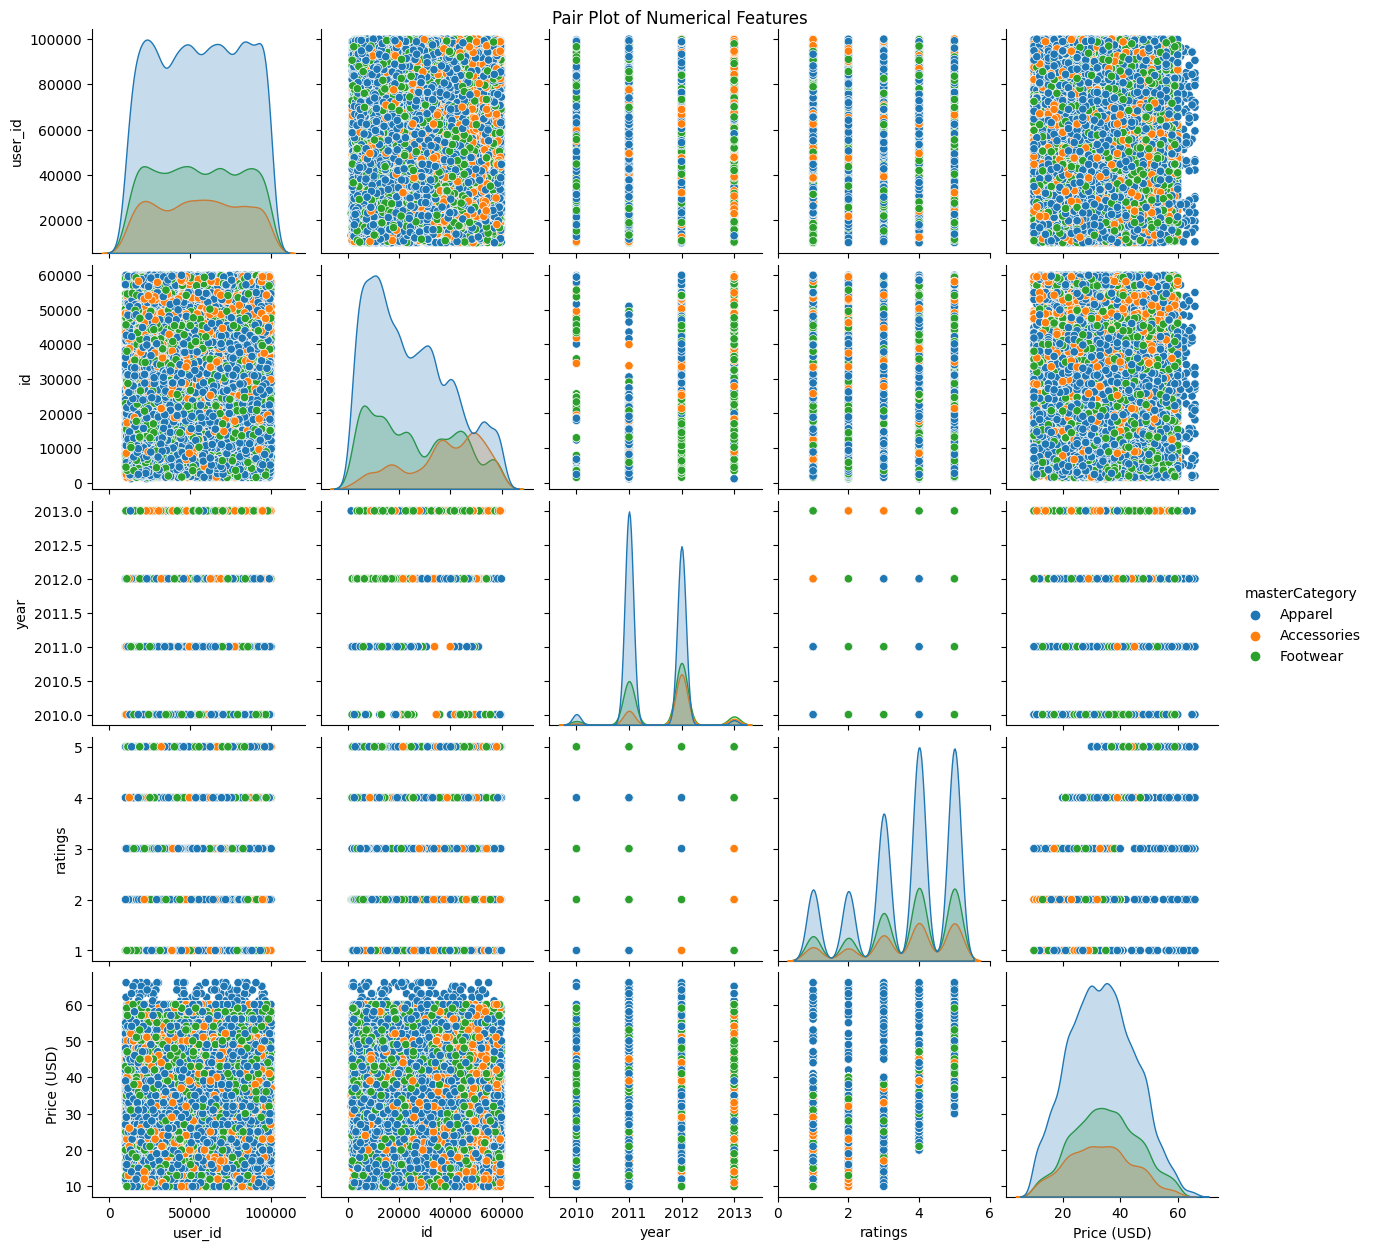

In [36]:
# Reset the index of your DataFrame to ensure it is unique:
df = df.reset_index(drop=True)

# Then, proceed with creating the pair plot:
sns.pairplot(df, diag_kind='kde', hue='masterCategory')
plt.suptitle('Pair Plot of Numerical Features', y=1.0)
plt.show()

In [37]:
from sklearn.utils import resample

# Separate the data into a list of dataframes by year
dfs = [df[df['year'] == year] for year in df['year'].unique()]

# Determine the target number of samples for each year (e.g., the average count)
target_samples = int(np.mean([len(sub_df) for sub_df in dfs]))

# Resample each year group to the target size
dfs_resampled = [resample(sub_df, replace=True, n_samples=target_samples, random_state=42) for sub_df in dfs]

# Combine all resampled groups into a single dataframe
df_balanced = pd.concat(dfs_resampled)

In [38]:
df_balanced.year.value_counts()

2013.0    7137
2012.0    7137
2011.0    7137
2010.0    7137
Name: year, dtype: int64

In [39]:
df_balanced.head()

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
16573,19828,23248,Men,Footwear,Shoes,Formal Shoes,Brown,Fall,2011.0,Formal,Arrow Men Formal Brown Shoe,23248.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied..",February,39
1968,54541,20191,Men,Apparel,Topwear,Tshirts,Grey,Fall,2011.0,Casual,Wrangler Men Grey Polo T-shirt,20191.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. for casua...",August,44
12353,72493,13836,Men,Apparel,Bottomwear,Shorts,Navy Blue,Fall,2011.0,Casual,Probase Men Solid Navy Blue Shorts,13836.jpg,http://assets.myntassets.com/v1/images/style/p...,1,"Very disappointed, won't buy again. for specia...",March,56
11940,40735,15577,Boys,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Chhota Bheem Kids Boys Warrior Bheem TShirt,15577.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. for speci...",October,55
27269,98470,7768,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Sports,Nike Men's As Vapor Ulti Grey Black T-Shirt,7768.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"Fair product, but don't expect much. for every...",November,20


<AxesSubplot:xlabel='year', ylabel='Count'>

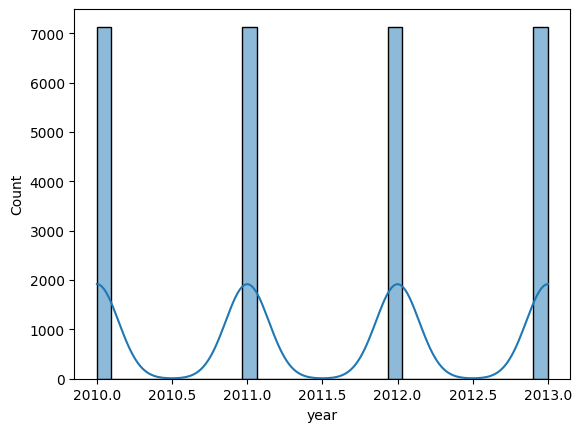

In [40]:
sns.histplot(df_balanced["year"],kde=True)

In [41]:
# label encoding categorical columns
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df_encoded = df.copy()
for i in catnames:
    df_encoded[i] = le.fit_transform(df[i])

In [42]:
df_encoded

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,4,1,2,46,1,0,2011.0,0,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,9,46
1,24592,30757,2,1,10,23,13,2,2012.0,1,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",11,29
2,13278,14881,4,0,0,17,1,2,2011.0,0,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",10,39
3,46048,48449,2,1,10,63,2,2,2012.0,0,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",1,39
4,28289,12868,2,2,8,16,1,1,2012.0,2,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,73318,54078,2,2,8,48,29,2,2012.0,5,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",11,41
28547,18851,13183,2,2,8,48,42,0,2011.0,5,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",4,53
28548,55457,10264,2,2,8,16,1,2,2013.0,2,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",9,43
28549,40311,45378,4,2,8,14,1,2,2012.0,0,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",9,48


In [43]:
# scaling the columns
features_to_be_scaled = ['gender', 'masterCategory', 'subCategory', 'articleType',
    'baseColour', 'season', 'ratings', 'Price (USD)', 'Month', 'year','usage']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features_to_be_scaled])

In [44]:
df_scaled

array([[ 1.16326346, -0.16326884, -1.79172866, ...,  1.00974801,
        -0.89061529, -0.51892601],
       [-0.69998114, -0.16326884,  0.65888518, ...,  1.5890629 ,
         0.74493865,  0.08280644],
       [ 1.16326346, -1.78240348, -2.40438213, ...,  1.29940545,
        -0.89061529, -0.51892601],
       ...,
       [-0.69998114,  1.4558658 ,  0.04623172, ...,  1.00974801,
         2.3804926 ,  0.68453889],
       [ 1.16326346,  1.4558658 ,  0.04623172, ...,  1.00974801,
         0.74493865, -0.51892601],
       [ 0.23164116,  1.4558658 ,  0.04623172, ..., -0.72819664,
        -0.89061529, -0.51892601]])

In [45]:
# applying pca for dimanesionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

In [46]:
# elbow method to decide clusters for k-means clustering analysis
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

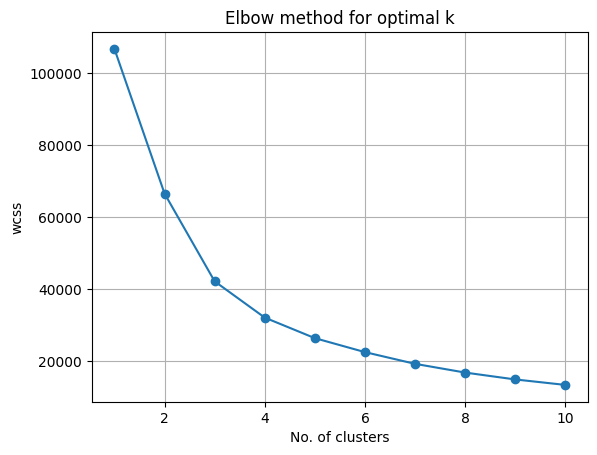

In [47]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.title("Elbow method for optimal k")
plt.grid(True)
plt.show()

In [48]:
df_pca = pd.DataFrame(pca_result,columns=['pca1','pca2'])
df_pca

,pca1,pca2
0,0.429872,-1.532470
1,0.436964,0.014366
2,2.464212,-0.116658
3,-0.264773,-1.068773
4,0.197315,0.542015
...,...,...
28546,-0.943306,-1.384033
28547,-2.547851,-1.992272
28548,1.120116,-1.742129
28549,1.313849,-1.894369


In [49]:
kmeans = KMeans(n_clusters=3,random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)
df_pca

,pca1,pca2,cluster
0,0.429872,-1.532470,0
1,0.436964,0.014366,1
2,2.464212,-0.116658,1
3,-0.264773,-1.068773,0
4,0.197315,0.542015,2
...,...,...,...
28546,-0.943306,-1.384033,0
28547,-2.547851,-1.992272,0
28548,1.120116,-1.742129,1
28549,1.313849,-1.894369,1


In [50]:
df_pca.isnull().sum()

pca1       0
pca2       0
cluster    0
dtype: int64

In [51]:
df.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

# Now you can safely add the cluster column
df['cluster'] = df_pca['cluster']

In [52]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
cluster               0
dtype: int64

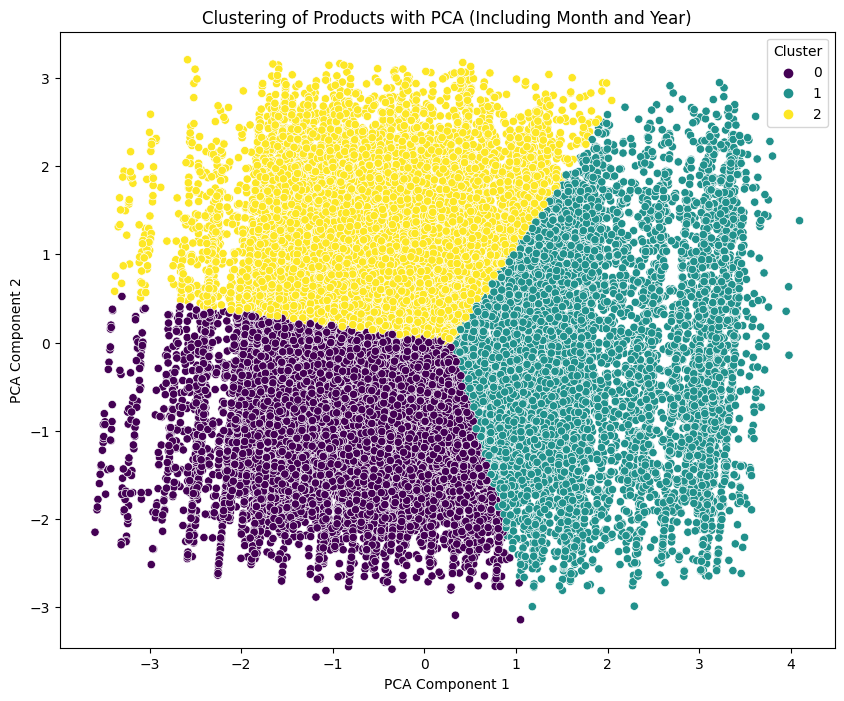

In [53]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca,
    x='pca1', y='pca2',
    hue='cluster',
    palette='viridis'
)
plt.title('Clustering of Products with PCA (Including Month and Year)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [54]:
df.shape

(28551, 18)

In [55]:
df

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD),cluster
0,93810,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46,0
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29,1
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39,1
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39,0
4,28289,12868,Men,Footwear,Shoes,Formal Shoes,Black,Spring,2012.0,Formal,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,August,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,73318,54078,Men,Footwear,Shoes,Sports Shoes,Orange,Summer,2012.0,Sports,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",September,41,0
28547,18851,13183,Men,Footwear,Shoes,Sports Shoes,White,Fall,2011.0,Sports,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",January,53,0
28548,55457,10264,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2013.0,Formal,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",November,43,1
28549,40311,45378,Women,Footwear,Shoes,Flats,Black,Summer,2012.0,Casual,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",November,48,1


In [56]:
df.columns

Index(['user_id', 'id', 'gender', 'masterCategory', 'subCategory',
       'articleType', 'baseColour', 'season', 'year', 'usage',
       'productDisplayName', 'filename', 'link', 'ratings', 'review', 'Month',
       'Price (USD)', 'cluster'],
      dtype='object')

In [57]:
numnames

['id', 'year', 'ratings', 'Price (USD)']

In [58]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
cluster               0
dtype: int64

In [59]:
df_encoded = df.copy()
le_dict = {}

for col in catnames:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

print("Encoded DataFrame:")
print(df_encoded)

subcategory_mapping = {label: idx for label, idx in zip(le_dict['subCategory'].classes_, le_dict['subCategory'].transform(le_dict['subCategory'].classes_))}
decode_mapping = {idx: label for idx, label in zip(le_dict['subCategory'].transform(le_dict['subCategory'].classes_),le_dict['subCategory'].classes_)}
gender_mapping = {label: idx for label, idx in zip(le_dict['gender'].classes_, le_dict['gender'].transform(le_dict['gender'].classes_))}
colour_mapping = {label: idx for label, idx in zip(le_dict['baseColour'].classes_, le_dict['baseColour'].transform(le_dict['baseColour'].classes_))}

print("Subcategory Mapping (Original to Encoded):", subcategory_mapping)
print("Decoded Subcategory Mapping (Encoded to Original):", decode_mapping)
print("Gender Mapping (Original to Encoded):", gender_mapping)
print("Colour Mapping (Original to Encoded):", colour_mapping)

Encoded DataFrame:
       user_id     id  gender  masterCategory  subCategory  articleType  \
0        93810   8493       4               1            2           46   
1        24592  30757       2               1           10           23   
2        13278  14881       4               0            0           17   
3        46048  48449       2               1           10           63   
4        28289  12868       2               2            8           16   
...        ...    ...     ...             ...          ...          ...   
28546    73318  54078       2               2            8           48   
28547    18851  13183       2               2            8           48   
28548    55457  10264       2               2            8           16   
28549    40311  45378       4               2            8           14   
28550    85631   5864       3               2            8            7   

       baseColour  season    year  usage  \
0               1       0  2011.0   

In [60]:
df_encoded.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df_encoded['cluster'] = df['cluster']
df_encoded

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD),cluster
0,93810,8493,4,1,2,46,1,0,2011.0,0,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,9,46,0
1,24592,30757,2,1,10,23,13,2,2012.0,1,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",11,29,1
2,13278,14881,4,0,0,17,1,2,2011.0,0,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",10,39,1
3,46048,48449,2,1,10,63,2,2,2012.0,0,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",1,39,0
4,28289,12868,2,2,8,16,1,1,2012.0,2,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,1,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,73318,54078,2,2,8,48,29,2,2012.0,5,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",11,41,0
28547,18851,13183,2,2,8,48,42,0,2011.0,5,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",4,53,0
28548,55457,10264,2,2,8,16,1,2,2013.0,2,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",9,43,1
28549,40311,45378,4,2,8,14,1,2,2012.0,0,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",9,48,1


In [61]:
df_encoded.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
cluster               0
dtype: int64

In [62]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[['ratings', 'Price (USD)','year']])
scaled_df = pd.DataFrame(scaled_features, columns=['ratings', 'Price (USD)','year'])

processed_dataset = pd.concat([df_encoded[['id', 'gender', 'masterCategory', 'subCategory', 'articleType','baseColour', 'season', 'usage', 'productDisplayName', 'Month','cluster']],scaled_df], axis=1)
processed_dataset

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,Month,cluster,ratings,Price (USD),year
0,8493,4,1,2,46,1,0,0,Forever New Women Black Skirts,9,0,1.096569,1.078573,-0.890615
1,30757,2,1,10,23,13,2,1,Fabindia Men Grey Mangalgiri Kurta,11,1,0.315506,-0.423844,0.744939
2,14881,4,0,0,17,1,2,0,United Colors of Benetton Women Solid Black Ha...,10,1,-0.465558,0.459931,-0.890615
3,48449,2,1,10,63,2,2,0,French Connection Men Blue T-shirt,1,0,1.096569,0.459931,0.744939
4,12868,2,2,8,16,1,1,2,Lee Cooper Men Formal Black Shoes,1,2,-0.465558,-0.865732,0.744939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,54078,2,2,8,48,29,2,5,ADIDAS Men Orange F50 Adizero HG Football Shoes,11,0,1.096569,0.636686,0.744939
28547,13183,2,2,8,48,42,0,5,Fila Men Dls 96 White Sports Shoes,4,0,1.096569,1.697216,-0.890615
28548,10264,2,2,8,16,1,2,2,Clarks Men Goya Band Leather Black Formal Shoes,9,1,1.096569,0.813441,2.380493
28549,45378,4,2,8,14,1,2,0,Rocia Women Black Sandals,9,1,1.096569,1.255328,0.744939


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split

processed_dataset['combined_features'] = processed_dataset[['gender', 'baseColour', 'masterCategory',
                                             'subCategory', 'articleType', 'year',
                                             'Month', 'ratings', 'season',
                                             'usage', 'Price (USD)', 'productDisplayName']].astype(str).agg(' '.join, axis=1)

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_dataset['combined_features'])
# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())


#tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [73]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrices = {}
for cluster_id in range(3):
    cluster_items = processed_dataset[processed_dataset['cluster'] == cluster_id]
    cluster_tfidf = tfidf_matrix[cluster_items.index]

    similarity_matrix = cosine_similarity(cluster_tfidf)
    similarity_matrices[cluster_id] = similarity_matrix

In [74]:
complementary_map = {
    'Topwear': ['Bottomwear', 'Shoes', 'Flip Flops', 'Jewellery', 'Eyewear', 'Belts', 'Bags', 'Watches', 'Wallets'],
    'Bottomwear': ['Topwear', 'Shoes', 'Flip Flops', 'Bags', 'Belts', 'Watches', 'Wallets'],
    'Bags': ['Topwear', 'Bottomwear', 'Shoes', 'Watches', 'Jewellery', 'Eyewear'],
    'Watches': ['Topwear', 'Bottomwear', 'Bags', 'Shoes', 'Jewellery'],
    'Shoes': ['Topwear', 'Bottomwear', 'Flip Flops', 'Socks', 'Eyewear', 'Belts'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Socks', 'Belts', 'Eyewear'],
    'Jewellery': ['Topwear', 'Saree', 'Watches', 'Eyewear'],
    'Eyewear': ['Topwear', 'Bottomwear', 'Shoes', 'Jewellery'],
    'Belts': ['Topwear', 'Bottomwear', 'Shoes', 'Flip Flops', 'Watches'],
    'Saree': ['Jewellery', 'Bags', 'Shoes'],
    'Loungewear and Nightwear': ['Bottomwear', 'Socks'],
    'Wallets': ['Topwear', 'Bottomwear', 'Bags', 'Watches'],
    'Socks': ['Shoes', 'Flip Flops', 'Loungewear and Nightwear']
}

encoded_complementary_map = {
    subcategory_mapping[original]: [subcategory_mapping[comp] for comp in complements if comp in subcategory_mapping]
    for original, complements in complementary_map.items() if original in subcategory_mapping
}

print("Encoded Complementary Map:", encoded_complementary_map)

# the problem is with the mapping and not with clustering or anything, need to rectify this

Encoded Complementary Map: {10: [2, 8, 4, 5, 3, 1, 0, 12, 11], 2: [10, 8, 4, 0, 1, 12, 11], 0: [10, 2, 8, 12, 5, 3], 12: [10, 2, 0, 8, 5], 8: [10, 2, 4, 9, 3, 1], 4: [10, 2, 9, 1, 3], 5: [10, 7, 12, 3], 3: [10, 2, 8, 5], 1: [10, 2, 8, 4, 12], 7: [5, 0, 8], 6: [2, 9], 11: [10, 2, 0, 12], 9: [8, 4, 6]}


In [75]:
df['subCategory'].unique()

array(['Bottomwear', 'Topwear', 'Bags', 'Shoes', 'Flip Flops',
       'Jewellery', 'Belts', 'Saree', 'Wallets', 'Socks', 'Watches',
       'Loungewear and Nightwear', 'Eyewear'], dtype=object)

In [76]:
colour_contrast_map = {
    'Black': ['White', 'Grey', 'Beige', 'Silver', 'Cream'],
    'Grey': ['Black', 'White', 'Red', 'Navy Blue'],
    'Blue': ['White', 'Cream', 'Yellow', 'Pink', 'Silver'],
    'Pink': ['Navy Blue', 'White', 'Beige', 'Grey'],
    'Brown': ['Cream', 'White', 'Beige', 'Olive', 'Mustard'],
    'Cream': ['Black', 'Blue', 'Brown', 'Navy Blue', 'Purple'],
    'Green': ['White', 'Black', 'Navy Blue', 'Yellow', 'Brown'],
    'White': ['Black', 'Blue', 'Red', 'Navy Blue', 'Grey'],
    'Navy Blue': ['White', 'Yellow', 'Cream', 'Pink', 'Beige'],
    'Yellow': ['Black', 'Navy Blue', 'Grey', 'Green', 'Purple'],
    'Silver': ['Black', 'Blue', 'Pink', 'Red'],
    'Red': ['White', 'Black', 'Grey', 'Beige'],
    'Beige': ['Navy Blue', 'Black', 'Red', 'Olive', 'Cream'],
    'Maroon': ['Cream', 'Beige', 'White', 'Olive'],
    'Gold': ['Black', 'White', 'Cream', 'Navy Blue'],
    'Magenta': ['White', 'Navy Blue', 'Cream'],
    'Lavender': ['Navy Blue', 'White', 'Grey'],
    'Multi': ['White', 'Black'],
    'Purple': ['Yellow', 'White', 'Cream'],
    'Charcoal': ['White', 'Cream', 'Blue'],
    'Orange': ['White', 'Black', 'Navy Blue'],
    'Tan': ['Navy Blue', 'White', 'Black'],
    'Olive': ['White', 'Yellow', 'Cream', 'Tan'],
    'Off White': ['Black', 'Grey', 'Navy Blue'],
    'Grey Melange': ['Black', 'White', 'Red', 'Blue'],
    'Rust': ['White', 'Cream', 'Beige', 'Navy Blue'],
    'Turquoise Blue': ['White', 'Black', 'Yellow'],
    'Mustard': ['White', 'Black', 'Brown', 'Navy Blue'],
    'Khaki': ['White', 'Navy Blue', 'Brown'],
    'Lime Green': ['White', 'Black', 'Grey'],
    'Peach': ['Blue', 'Black', 'Navy Blue'],
    'Sea Green': ['White', 'Black', 'Navy Blue'],
    'Teal': ['White', 'Cream', 'Navy Blue'],
    'Mauve': ['White', 'Grey', 'Blue'],
    'Copper': ['White', 'Black', 'Navy Blue'],
    'Steel': ['Black', 'White', 'Beige'],
    'Bronze': ['White', 'Black'],
    'Nude': ['White', 'Black', 'Beige'],
    'Metallic': ['White', 'Black', 'Silver'],
    'Taupe': ['White', 'Black', 'Beige'],
    'Fluorescent Green': ['White', 'Black'],
    'Burgundy': ['White', 'Beige', 'Grey'],
    'Mushroom Brown': ['White', 'Grey', 'Black'],
    'Coffee Brown': ['White', 'Beige', 'Cream']
}

encoded_complementary_colour_map = {
    colour_mapping[original]: [colour_mapping[comp] for comp in complements if comp in colour_mapping]
    for original, complements in colour_contrast_map.items() if original in colour_mapping
}

print("Encoded Complementary Map:", encoded_complementary_colour_map)

Encoded Complementary Map: {1: [42, 13, 0, 36, 9], 13: [1, 42, 33, 25], 2: [42, 9, 43, 31, 36], 31: [25, 42, 0, 13], 4: [9, 42, 0, 28, 24], 9: [1, 2, 4, 25, 32], 12: [42, 1, 25, 43, 4], 42: [1, 2, 33, 25, 13], 25: [42, 43, 9, 31, 0], 43: [1, 25, 13, 12, 32], 36: [1, 2, 31, 33], 33: [42, 1, 13, 0], 0: [25, 1, 33, 28, 9], 19: [9, 0, 42, 28], 11: [1, 42, 9, 25], 18: [42, 25, 9], 16: [25, 42, 13], 22: [42, 1], 32: [43, 42, 9], 6: [42, 9, 2], 29: [42, 1, 25], 38: [25, 42, 1], 28: [42, 43, 9, 38], 27: [1, 13, 25], 14: [1, 42, 33, 2], 34: [42, 9, 0, 25], 41: [42, 1, 43], 24: [42, 1, 4, 25], 15: [42, 25, 4], 17: [42, 1, 13], 30: [2, 1, 25], 35: [42, 1, 25], 40: [42, 9, 25], 20: [42, 13, 2], 8: [42, 1, 25], 37: [1, 42, 0], 3: [42, 1], 26: [42, 1, 0], 21: [42, 1, 36], 39: [42, 1, 0], 10: [42, 1], 5: [42, 0, 13], 23: [42, 13, 1], 7: [42, 0, 9]}


In [77]:
len(processed_dataset[processed_dataset.cluster==2].values)

9768

In [78]:
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations(product_id, df_encoded, tfidf_matrix, encoded_complementary_map, encoded_complementary_colour_map):
    # Get the index and details of the target product
    try:
        product_index = df_encoded[df_encoded['id'] == product_id].index[0]
    except IndexError:
        print(f"Product ID {product_id} not found in the dataset")
        return []

    # Extract TF-IDF vector for the target product
    target_vector = tfidf_matrix[product_index].reshape(1, -1)

    # Get target product's attributes
    encoded_subcategory = df_encoded.loc[product_index, 'subCategory']
    product_gender = df_encoded.loc[product_index, 'gender']
    encoded_colour = df_encoded.loc[product_index, 'baseColour']

    print(f"Product Index: {product_index}")
    print(f"Encoded Subcategory: {encoded_subcategory}, Gender: {product_gender}, Colour: {encoded_colour}")

    # Fetch complementary subcategories and color mappings for the target product
    complementary_subcategories = encoded_complementary_map.get(encoded_subcategory, [])
    complementary_colours = encoded_complementary_colour_map.get(encoded_colour, [])

    # Initialize dictionary to store the best item from each complementary subcategory
    recommendations = {}

    # Iterate over each complementary subcategory to find the best matching item
    for comp_subcategory in complementary_subcategories:
        # First, filter items by strict criteria
        comp_items_strict = df_encoded[(df_encoded['subCategory'] == comp_subcategory) &
                                       (df_encoded['gender'] == product_gender) &
                                       (df_encoded['baseColour'].isin(complementary_colours))]

        # Relaxed filter (if strict filtering yields no results)
        if comp_items_strict.empty:
            print(f"No strict matches found for {comp_subcategory}. Using relaxed filtering.")
            comp_items_relaxed = df_encoded[(df_encoded['subCategory'] == comp_subcategory) &
                                            (df_encoded['gender'] == product_gender)]
        else:
            comp_items_relaxed = comp_items_strict

        # If no items at all found, log and skip
        if comp_items_relaxed.empty:
            print(f"No items found for subcategory: {comp_subcategory} with relaxed filtering.")
            continue

        # Calculate similarity scores with relaxed filter items
        comp_indices = comp_items_relaxed.index
        comp_vectors = tfidf_matrix[comp_indices]
        similarity_scores = cosine_similarity(target_vector, comp_vectors).flatten()

        # Select the best match in terms of similarity score
        best_match_index = comp_indices[similarity_scores.argmax()]
        best_match_id = df_encoded.loc[best_match_index, 'id']
        best_similarity_score = similarity_scores.max()

        # Store the best item for this subcategory
        recommendations[comp_subcategory] = (best_match_id, best_similarity_score)

    # Collect the recommended product IDs
    recommended_product_ids = [item[0] for item in recommendations.values()]

    # Check if all complementary subcategories were covered
    missing_subcategories = set(complementary_subcategories) - set(recommendations.keys())
    if missing_subcategories:
        print(f"Some complementary subcategories could not be filled in the outfit: {missing_subcategories}")

    return recommended_product_ids


In [79]:
processed_dataset.id.sample(5)

12992     3290
11225    50323
10134    46264
27762    28819
14323     7143
Name: id, dtype: int64

In [80]:
subcategory_mapping

{'Bags': 0,
 'Belts': 1,
 'Bottomwear': 2,
 'Eyewear': 3,
 'Flip Flops': 4,
 'Jewellery': 5,
 'Loungewear and Nightwear': 6,
 'Saree': 7,
 'Shoes': 8,
 'Socks': 9,
 'Topwear': 10,
 'Wallets': 11,
 'Watches': 12}

In [81]:
gender_mapping

{'Boys': 0, 'Girls': 1, 'Men': 2, 'Unisex': 3, 'Women': 4}

In [85]:
product_id= 30820
recommended_products = get_recommendations(product_id,df_encoded,tfidf_matrix,encoded_complementary_map,encoded_complementary_colour_map)
print("Recommended products:", recommended_products)

Product Index: 8
Encoded Subcategory: 2, Gender: 4, Colour: 9
Recommended products: [32210, 59056, 44195, 31918, 38418, 19264, 38440]


In [84]:
recommended_product_ids = [30820,32210, 59056, 44195, 31918, 38418, 19264, 38440]
recommended_products = df[df['id'].isin(recommended_product_ids)]
print(recommended_products)

       user_id     id gender masterCategory subCategory   articleType  \
8        21395  30820  Women        Apparel  Bottomwear      Leggings   
3662     30758  38440  Women    Accessories     Wallets       Wallets   
11685    14138  31918  Women    Accessories        Bags      Clutches   
17453    18600  32210  Women        Apparel     Topwear        Kurtas   
17786    77045  38418  Women    Accessories       Belts         Belts   
20101    29342  44195  Women       Footwear  Flip Flops    Flip Flops   
23280    30517  59056  Women       Footwear       Shoes  Casual Shoes   
26845    96662  19264  Women    Accessories     Watches       Watches   

      baseColour  season    year   usage  \
8          Cream  Summer  2012.0  Ethnic   
3662       Black  Summer  2012.0  Casual   
11685       Blue  Summer  2012.0  Casual   
17453      Black  Summer  2012.0  Ethnic   
17786     Purple  Summer  2012.0  Casual   
20101      Black  Winter  2012.0  Casual   
23280       Blue  Winter  2012.0  

In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
import numpy as np

ground_truth_relevant_items = [32210, 59056, 44195, 31918, 38418, 19264, 38440] 

product_id = 30820
recommended_products = get_recommendations(product_id, df_encoded, tfidf_matrix, encoded_complementary_map, encoded_complementary_colour_map)

# 1 if relevant, 0 if not, to calculate precision, recall, etc.
y_true = [1 if item in ground_truth_relevant_items else 0 for item in recommended_products]
y_pred = [1] * len(recommended_products) 

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_true, y_pred, zero_division=1)
recall = recall_score(y_true, y_pred, zero_division=1)
f1 = f1_score(y_true, y_pred, zero_division=1)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Step 4: Mean Average Precision (MAP) for top-K items
# Since this function evaluates average precision per item, it can serve as a good measure.
# You can adjust `k` based on the length of `recommended_products`
average_precision = average_precision_score(y_true, y_pred)

print(f"Mean Average Precision (MAP): {average_precision}")

# Step 5: Coverage metric (optional) - Checks if recommended items cover all complementary categories
all_possible_subcategories = set(encoded_complementary_map.keys())
recommended_subcategories = {df_encoded.loc[df_encoded['id'] == item, 'subCategory'].values[0] for item in recommended_products}
coverage = len(recommended_subcategories) / len(all_possible_subcategories)

print(f"Coverage: {coverage}")


Product Index: 8
Encoded Subcategory: 2, Gender: 4, Colour: 9
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Mean Average Precision (MAP): 1.0
Coverage: 0.5384615384615384


In [93]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calculate_diversity(recommended_ids, tfidf_matrix, df_encoded):
    # Get the indices of the recommended products in the original dataframe
    recommended_indices = df_encoded[df_encoded['id'].isin(recommended_ids)].index
    
    # Extract TF-IDF vectors for these recommendations
    recommended_vectors = tfidf_matrix[recommended_indices]
    
    # Calculate the cosine similarity matrix between recommended items
    similarity_matrix = cosine_similarity(recommended_vectors)
    
    # Take only the upper triangle of the similarity matrix (excluding diagonal)
    upper_triangle_indices = np.triu_indices_from(similarity_matrix, k=1)
    diversity_score = 1 - np.mean(similarity_matrix[upper_triangle_indices])
    
    print(f"Diversity Score: {diversity_score}")
    return diversity_score

# Example usage:
diversity_score = calculate_diversity(recommended_products, tfidf_matrix, df_encoded)


Diversity Score: 0.8504634446403103


In [94]:
def calculate_coverage(recommended_ids, df_encoded, category_column='subCategory'):
    # Get unique categories in the entire dataset
    total_unique_categories = df_encoded[category_column].nunique()
    
    # Get unique categories in the recommended products
    recommended_categories = df_encoded[df_encoded['id'].isin(recommended_ids)][category_column].nunique()
    
    # Calculate coverage as a ratio
    coverage_score = recommended_categories / total_unique_categories
    
    print(f"Coverage Score ({category_column}): {coverage_score}")
    return coverage_score

# Example usage for subcategory coverage:
subcategory_coverage = calculate_coverage(recommended_products, df_encoded, category_column='subCategory')


Coverage Score (subCategory): 0.5384615384615384


In [96]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
df_train, df_test = train_test_split(df_encoded, test_size=0.2, random_state=42)
print(f"Train set size: {len(df_train)}, Test set size: {len(df_test)}")


Train set size: 22840, Test set size: 5711


In [97]:
def synthetic_testing(test_set, train_set, tfidf_matrix, encoded_complementary_map, encoded_complementary_colour_map):
    matched_count = 0
    total_count = len(test_set)
    
    for _, test_item in test_set.iterrows():
        test_product_id = test_item['id']
        
        # Get recommendations for the test product
        recommended_products = get_recommendations(
            product_id=test_product_id,
            df_encoded=train_set,
            tfidf_matrix=tfidf_matrix,
            encoded_complementary_map=encoded_complementary_map,
            encoded_complementary_colour_map=encoded_complementary_colour_map
        )
        
        # Check if any recommended product matches with the test item’s attributes
        test_subcategory = test_item['subCategory']
        test_colour = test_item['baseColour']
        test_gender = test_item['gender']
        
        for recommended_id in recommended_products:
            recommended_item = train_set[train_set['id'] == recommended_id]
            if not recommended_item.empty:
                if (recommended_item['subCategory'].values[0] == test_subcategory and
                    recommended_item['baseColour'].values[0] == test_colour and
                    recommended_item['gender'].values[0] == test_gender):
                    matched_count += 1
                    break  # Stop after finding one match
        
    # Calculate accuracy as the ratio of matched items
    accuracy = matched_count / total_count
    print(f"Synthetic Test Accuracy: {accuracy}")
    return accuracy

# Example usage:
accuracy = synthetic_testing(df_test, df_train, tfidf_matrix, encoded_complementary_map, encoded_complementary_colour_map)


Product ID 26684 not found in the dataset
Product ID 35908 not found in the dataset
Product ID 42549 not found in the dataset
Product ID 25034 not found in the dataset
Product ID 24597 not found in the dataset
Product ID 36323 not found in the dataset
Product ID 15343 not found in the dataset
Product ID 23304 not found in the dataset
Product ID 19555 not found in the dataset
Product ID 11432 not found in the dataset
Product ID 3342 not found in the dataset
Product ID 42934 not found in the dataset
Product ID 34116 not found in the dataset
Product ID 11804 not found in the dataset
Product ID 3870 not found in the dataset
Product ID 56658 not found in the dataset
Product ID 16206 not found in the dataset
Product ID 3128 not found in the dataset
Product ID 17705 not found in the dataset
Product ID 13836 not found in the dataset
Product ID 19211 not found in the dataset
Product ID 24094 not found in the dataset
Product ID 9022 not found in the dataset
Product ID 2501 not found in the datas